In [0]:
# check GPU is running
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2283933587415088670
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3573344239392553685
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 8779934745839515868
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14892338381
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6450134380536235511
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [0]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense

import numpy as np
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [0]:
# resize images
nrow = 150
ncol = 150

In [0]:
model = applications.VGG16(weights='imagenet', include_top=False, input_shape = (nrow, ncol, 3))

W0813 23:34:43.887412 139815015044992 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
# create a new model
siim_model = Sequential()

In [0]:
# add each layer to the new model
for layer in model.layers:
  siim_model.add(layer)

for layer in siim_model.layers:
  layer.trainable = False

In [0]:
siim_model.add(Flatten())
siim_model.add(Dense(256, activation = "relu"))
siim_model.add(Dropout(0.5))
siim_model.add(Dense(1, activation = "sigmoid"))

In [0]:
siim_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       2

In [0]:
train_data_dir = r'/content/gdrive/My Drive/model/train'
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='binary')

Found 8541 images belonging to 2 classes.


In [0]:
test_data_dir = r'/content/gdrive/My Drive/model/test'
batch_size = 32
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_generator = train_datagen.flow_from_directory(
                        test_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='binary')

Found 2136 images belonging to 2 classes.


In [0]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

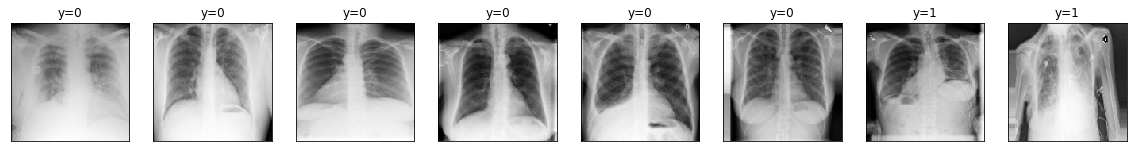

In [0]:
train_generator.reset()
X,y = train_generator.next()
plt.figure(figsize=(20,20))
nplot = 8
for i in range(nplot):
    plt.subplot(1,nplot,i+1)
    plt.title('y=%s' % int(y[i]))
    disp_image(X[i])

In [0]:
# Compile
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.1e-3)
hist = siim_model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

W0813 23:34:46.964661 139815015044992 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
train_size = train_generator.n
test_size = test_generator.n

steps_per_epoch = train_size // batch_size
validation_steps =  test_size // batch_size

In [0]:
# Number of epochs
nepochs = 10

# Call the fit_generator function
hist = siim_model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=nepochs,
    validation_data=test_generator,
    validation_steps=validation_steps)

Epoch 1/10
266/266 [==============================] - 137s 516ms/step - loss: 0.5082 - acc: 0.7721 - val_loss: 0.4714 - val_acc: 0.7775
Epoch 2/10
266/266 [==============================] - 134s 504ms/step - loss: 0.4704 - acc: 0.7865 - val_loss: 0.4608 - val_acc: 0.7808
Epoch 3/10
266/266 [==============================] - 134s 502ms/step - loss: 0.4544 - acc: 0.7889 - val_loss: 0.4503 - val_acc: 0.7860
Epoch 4/10
266/266 [==============================] - 132s 498ms/step - loss: 0.4485 - acc: 0.7910 - val_loss: 0.4846 - val_acc: 0.7723
Epoch 5/10
266/266 [==============================] - 133s 499ms/step - loss: 0.4416 - acc: 0.7957 - val_loss: 0.4483 - val_acc: 0.7879
Epoch 6/10
266/266 [==============================] - 132s 495ms/step - loss: 0.4329 - acc: 0.7997 - val_loss: 0.4519 - val_acc: 0.7893
Epoch 7/10
266/266 [==============================] - 133s 501ms/step - loss: 0.4264 - acc: 0.8000 - val_loss: 0.4561 - val_acc: 0.7926
Epoch 8/10
266/266 [============================

In [0]:
import pickle

In [0]:
# Save model
mod_name = 'basic'
h5_fn = ('cifar_%s.h5' % mod_name)
siim_model.save(h5_fn)
print('Model saved as %s' % h5_fn)

# Save history
hist_fn = ('hist_%s.p' % mod_name)
with open(hist_fn, 'wb') as fp:
    hist_dict = hist.history
    pickle.dump(hist_dict, fp) 
print('History saved as %s' % hist_fn)

Model saved as cifar_basic.h5
History saved as hist_basic.p


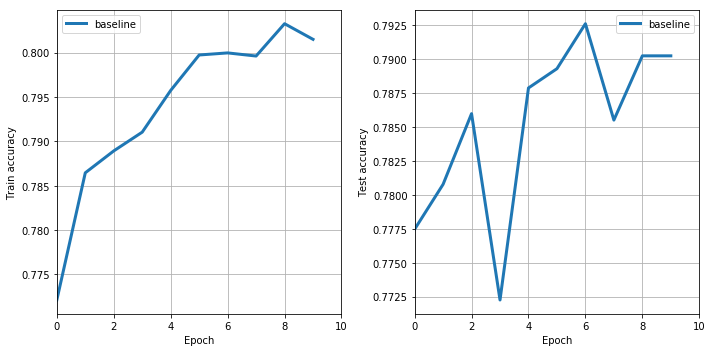

In [0]:
# Plot the training accuracy and validation accuracy curves in the same figure

mod_name_plot = ['basic']
plt.figure(figsize=(10,5))
for iplt in range(2):
    
    plt.subplot(1,2,iplt+1)
    for i, mod_name in enumerate(mod_name_plot):

        # Load history
        hist_fn = ('hist_%s.p' % mod_name)
        with open(hist_fn, 'rb') as fp:        
            hist_dict = pickle.load(fp) 

        if iplt == 0:
            acc = hist_dict['acc'][:43]
        else:
            acc = hist_dict['val_acc'][:43]
        plt.plot(acc, '-', linewidth=3)
    
    n = len(acc)
    nepochs = len(acc)
    plt.grid()
    plt.xlim([0, nepochs])
    plt.legend(['baseline'])
    plt.xlabel('Epoch')
    if iplt == 0:
        plt.ylabel('Train accuracy')
    else:
        plt.ylabel('Test accuracy')
        
plt.tight_layout()